In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Carregar os dados de treinamento e teste

In [54]:
X_train = pd.read_csv('../Dados/RedesNeurais/X_train.csv')
y_train = pd.read_csv('../Dados/RedesNeurais/y_train.csv')
X_test = pd.read_csv('../Dados/RedesNeurais/X_test.csv')
y_test = pd.read_csv('../Dados/RedesNeurais/y_test.csv')


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### 2.1) Configurando LabelEncoder

In [55]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## 2) Pré-processando dados

In [56]:
num_classes = len(np.unique(y_train_encoded))

# Converta as classes em vetores one-hot (para a camada de saída)
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

## 3) A) Testando Conjunto de dados

In [57]:
neuralNetwork = Sequential()
neuralNetwork.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
neuralNetwork.add(Dense(32, activation='relu'))
neuralNetwork.add(Dense(num_classes, activation='softmax'))  

neuralNetwork.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                320       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 


Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3) A.1) Treinando modelo

In [58]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acuracias = []
precisoes = []
revocacoes = []
f1_scores = []

# Setando a seed
np.random.seed(10)

i = 1

for train_index, test_index in kfold.split(X_train, y_train):
    print(f'\nFold {i}')


    X_treino_fold, X_teste_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_treino_fold, y_teste_fold = y_train_onehot[train_index], y_train_onehot[test_index]

    X_treino_fold = X_treino_fold.astype('float32')
    y_treino_fold = y_treino_fold.astype('float32')
    X_teste_fold = X_teste_fold.astype('float32')

    # Compilando o modelo
    neuralNetwork.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    neuralNetwork.fit(X_treino_fold, y_treino_fold, epochs=100, batch_size=32)

    y_pred = neuralNetwork.predict(X_teste_fold)

    y_pred_labels = np.argmax(y_pred, axis=1)
    y_teste_labels = np.argmax(y_teste_fold, axis=1)

    acuracia = accuracy_score(y_teste_labels, y_pred_labels)
    precisao = precision_score(y_teste_labels, y_pred_labels, average='weighted')
    revocacao = recall_score(y_teste_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_teste_labels, y_pred_labels, average='weighted')


    acuracias.append(acuracia)
    precisoes.append(precisao)
    revocacoes.append(revocacao)
    f1_scores.append(f1)
    i = i + 1

media_acuracias = np.mean(acuracias)
media_precisoes = np.mean(precisoes)
media_revocacoes = np.mean(revocacoes)
media_f1_scores = np.mean(f1_scores)

desvio_padrao_acuracias = np.sqrt(np.mean(sum((x - media_acuracias) ** 2 for x in acuracias)))
desvio_padrao_precisoes = np.sqrt(np.mean(sum((x - media_precisoes) ** 2 for x in precisoes)))
desvio_padrao_revocacoes = np.sqrt(np.mean(sum((x - media_revocacoes) ** 2 for x in revocacoes)))
desvio_padrao_f1_scores = np.sqrt(np.mean(sum((x - media_f1_scores) ** 2 for x in f1_scores)))

# Exibir resultados
print('\n---')
for i in range(len(acuracias)):
    print(f'Fold {i + 1}:')
    print(f'Acurácia: {acuracias[i]}')
    print(f'Precisão: {precisoes[i]}')
    print(f'Revocação: {revocacoes[i]}')
    print(f'F1-Score: {f1_scores[i]}')
    print('---')

print('\nMédias e Desvios Padrão Gerais:')
print("----------------------------------------------------------------")
print(f'Média Acurácias: {media_acuracias}')
print(f'Desvio Padrão Acurácias: {desvio_padrao_acuracias}\n')
print(f'Média Precisões: {media_precisoes}')
print(f'Desvio Padrão Precisões: {desvio_padrao_precisoes}\n')
print(f'Média Revocações: {media_revocacoes}')
print(f'Desvio Padrão Revocações: {desvio_padrao_revocacoes}\n')
print(f'Média F1-Scores: {media_f1_scores}')
print(f'Desvio Padrão F1-Scores: {desvio_padrao_f1_scores}\n')


Fold 1
Epoch 1/100
18/18 [==============================] - 0s 824us/step - loss: 1.1219 - accuracy: 0.4054
Epoch 2/100
18/18 [==============================] - 0s 765us/step - loss: 0.9557 - accuracy: 0.5125
Epoch 3/100
18/18 [==============================] - 0s 824us/step - loss: 0.9388 - accuracy: 0.5125
Epoch 4/100
18/18 [==============================] - 0s 823us/step - loss: 0.9296 - accuracy: 0.5125
Epoch 5/100
18/18 [==============================] - 0s 824us/step - loss: 0.9208 - accuracy: 0.5125
Epoch 6/100
18/18 [==============================] - 0s 765us/step - loss: 0.9110 - accuracy: 0.5125
Epoch 7/100
18/18 [==============================] - 0s 765us/step - loss: 0.9019 - accuracy: 0.5125
Epoch 8/100
18/18 [==============================] - 0s 824us/step - loss: 0.8960 - accuracy: 0.5125
Epoch 9/100
18/18 [==============================] - 0s 765us/step - loss: 0.8890 - accuracy: 0.5143
Epoch 10/100
18/18 [==============================] - 0s 765us/step - loss: 0.8766 

## 3) A.2) Predição

In [47]:
X_test = X_test.astype('float32')
y_pred = neuralNetwork.predict(X_test)

10/10 [==============================] - 0s 778us/step


## A.2) Matriz Confusão

In [52]:
# Obtendo as classes preditas diretamente dos rótulos codificados
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Convertendo as classes numéricas de volta para as classes originais usando label_encoder
y_pred_original = label_encoder.inverse_transform(y_pred_classes.reshape(-1, 1))
y_test_original = label_encoder.inverse_transform(y_test_classes.reshape(-1, 1))


cm = confusion_matrix(y_test_classes, y_pred_classes) 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

## A.3) Métricas de eficácia

In [ ]:
print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test_classes, y_pred_classes)  
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test_classes, y_pred_classes)
print(f'Relatório de Classificação:\n{classification_rep}')


# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

----------------------------------------------------------------
Acurácia no conjunto de teste: 96.00%
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.94      0.96      0.95        46
           2       0.95      0.93      0.94        42

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## 1) Carregar os dados de treinamento e teste

In [6]:
X_train = pd.read_csv('../Dados/RedesNeurais/X_train.csv')
y_train = pd.read_csv('../Dados/RedesNeurais/y_train.csv')
X_test = pd.read_csv('../Dados/RedesNeurais/X_test.csv')
y_test = pd.read_csv('../Dados/RedesNeurais/y_test.csv')


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### 2.1) Configurando LabelEncoder

## 2) Pré-processando dados

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

### 2.2) Corrigindo dados

In [8]:
# Padronizar as características (normalização)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter as classes em vetores one-hot (para a camada de saída)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3) Experimentando diferentes redes neurais

In [9]:
architectures = [
    (32, 32),        # Exemplo de arquitetura 1
    (64, 32, 16),    # Exemplo de arquitetura 2
    (128, 64),       # Exemplo de arquitetura 3
]

hyperparameters = {
    'activation_function': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128]
}

best_model = None
best_accuracy = 0.0
min_loss = 100

accuracies_train = []  
accuracies_test = [] 

table_data = []

### 3.1) Treinando redes neurais

In [10]:
combination_number = 1

for architecture in architectures:
    for activation_function in hyperparameters['activation_function']:
        for optimizer in hyperparameters['optimizer']:
            for batch_size in hyperparameters['batch_size']:
                    model = Sequential()
                    for units in architecture:
                        model.add(Dense(units, activation=activation_function, input_dim=X_train.shape[1]))
                    model.add(Dense(3, activation='softmax'))
                    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    
                    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0)

                    final_training_accuracy = history.history['accuracy'][-1]
                        
                    loss, accuracy = model.evaluate(X_val, y_val)

                    # _, test_accuracy = model.evaluate(X_test, y_test)
                    # accuracies_train.append(train_accuracy)
                    # accuracies_test.append(test_accuracy)

                    print(f'Arquitetura {architecture}:')
                    print(f'Acurácia na validação: {accuracy * 100:.2f}%')
                    print(f'Loss final: {loss * 100:.2f}%')
                    print("Hiperparâmetros:")
                    print(f'- Função de Ativação: {activation_function}')
                    print(f'- Otimizador: {optimizer}')
                    print(f'- Tamanho do Lote: {batch_size}')
                    print("----------------------------------------------------------------\n")

                    # Coletar informações da iteração atual para tabela
                    row = [combination_number, f'Arquitetura {architecture}', activation_function, optimizer, batch_size, final_training_accuracy * 100, accuracy * 100, loss * 100]
                    table_data.append(row)

                    combination_number += 1
                    
                    if accuracy > best_accuracy and loss < min_loss:
                        best_accuracy = accuracy
                        best_model = model
                        best_hyperparameters = {
                        'Arquitetura': architecture,
                        'Função de Ativação': activation_function,
                        'Otimizador': optimizer,
                        'Tamanho do Lote': batch_size
                    }

        
# Imprimir informações sobre o melhor modelo
print("Melhor Modelo:")
print(f"Acurácia na Validação: {best_accuracy * 100:.2f}%")
print("Melhores Hiperparâmetros:")
for key, value in best_hyperparameters.items():
    print(f"- {key}: {value}")

NameError: name 'X_val' is not defined

In [ ]:
# ## 3.1) Construindo redes neurais
# for architecture in architectures:
#     model = Sequential()
#     for units in architecture:
#         model.add(Dense(units, activation='relu', input_dim=X_train.shape[1]))
#     model.add(Dense(3, activation='softmax'))  # 3 unidades na camada de saída para as três classes
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

#     train_accuracy = [acc * 100 for acc in history.history['accuracy']]

#     loss, accuracy = model.evaluate(X_val, y_val)

#     _, test_accuracy = model.evaluate(X_test, y_test)
    
#     accuracies_train.append(train_accuracy)
#     accuracies_test.append(test_accuracy)

#     print(f'Arquitetura {architecture}: Acurácia na validação: {accuracy * 100:.2f}%')
#     print(f'Arquitetura {architecture}: Loss final: {loss * 100:.2f}%')
#     print("----------------------------------------------------------------\n")

#     if accuracy > best_accuracy and loss < min_loss:
#         best_accuracy = accuracy
#         best_model = model

### 3.2) Plotando Diferenças
# plt.figure(figsize=(12, 6))

# for i, architecture in enumerate(architectures):
#     plt.plot(accuracies_train[i], label=f'Treinamento - Arquitetura {architecture}')

# plt.title('Acurácia de Treinamento')
# plt.xlabel('Épocas')
# plt.ylabel('Acurácia')
# plt.legend()

# plt.ylim(0, 100)

# test_accuracies = [accuracy * 100 for accuracy in accuracies_test]
# architecture_labels = [f'Arquitetura {architecture}' for architecture in architectures]

# plt.figure(figsize=(12, 6))
# plt.bar(architecture_labels, test_accuracies, color='dodgerblue', alpha=0.7)
# plt.title('Acurácia no Conjunto de Teste')
# plt.xlabel('Arquitetura da Rede Neural')
# plt.ylabel('Acurácia')
# plt.ylim(0, 100) 
# plt.xticks(rotation=45)

# # Adicionar os valores das barras
# for i, v in enumerate(test_accuracies):
#     plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# plt.show()


### 3.2) Tabela comparativa para todas combinações

In [ ]:
headers = ['Combinação', 'Arquitetura', 'Função de Ativação', 'Otimizador', 'Tamanho do Lote', 'Train Score', ' Validation Score', 'Final Loss']
table = tabulate(table_data, headers, tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤══════════════════════════╤══════════════════════╤══════════════╤═══════════════════╤═══════════════╤═════════════════════╤══════════════╕
│ Combinação   │ Arquitetura              │ Função de Ativação   │ Otimizador   │ Tamanho do Lote   │ Train Score   │  Validation Score   │ Final Loss   │
╞══════════════╪══════════════════════════╪══════════════════════╪══════════════╪═══════════════════╪═══════════════╪═════════════════════╪══════════════╡
│ 1            │ Arquitetura (32, 32)     │ relu                 │ adam         │ 32                │ 94.5714       │ 91.3333             │ 17.9234      │
├──────────────┼──────────────────────────┼──────────────────────┼──────────────┼───────────────────┼───────────────┼─────────────────────┼──────────────┤
│ 2            │ Arquitetura (32, 32)     │ relu                 │ adam         │ 64                │ 91.7143       │ 92.6667             │ 23.5033      │
├──────────────┼──────────────────────────┼──────────────────────┼────

## 4) Avaliando melhor rede neural

In [ ]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Melhor modelo - Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9467
Melhor modelo - Acurácia no conjunto de teste: 94.67%


### 4.1) Predição do melhor modelo

In [ ]:
y_pred = best_model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


### 4.2) Matriz Confusão

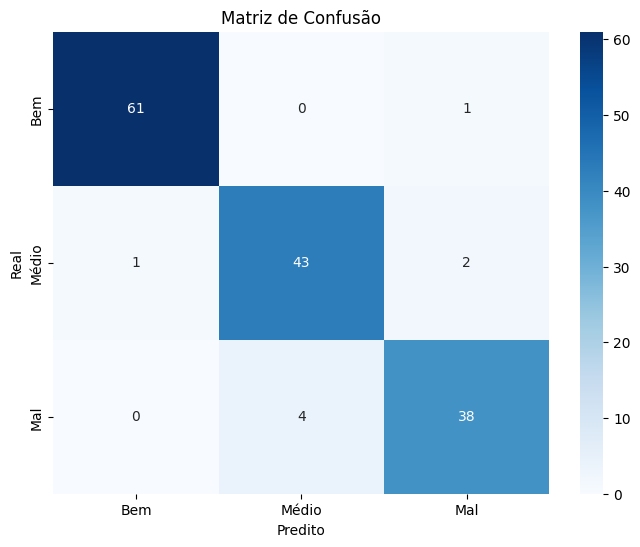

In [ ]:
# Transformar as previsões de volta para as classes originais
y_pred_classes = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_test_classes = label_encoder.inverse_transform(np.argmax(y_test, axis=1))


cm = confusion_matrix(y_test_classes, y_pred_classes)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 4.3) Métricas de eficácia

In [ ]:
print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test_classes, y_pred_classes)  
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test_classes, y_pred_classes)
print(f'Relatório de Classificação:\n{classification_rep}')


# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

----------------------------------------------------------------
Acurácia no conjunto de teste: 94.67%
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.91      0.93      0.92        46
           2       0.93      0.90      0.92        42

    accuracy                           0.95       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

